In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [36]:
#!pip install ppscore

# Predictive Power Score

Import predictive power score, to obtain the predictive correlation between each feature and the target. This is able to tell if two features (or feature and target) have any kind of correlation, not only linear, even if one if numeric and the other categorical.

Find out more in https://github.com/8080labs/ppscore
or 
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598


In [37]:
import ppscore as pps

In [38]:
# Load cleaned data
data_df = pd.read_csv("data/cleaned_data.csv",index_col=0)
data_df.head()

,DateTime,CurrentSpeed,CurrentDir,TWS,TWA,AWS,AWA,Roll,Pitch,HeadingMag,...,AvgSoS,VMG,RudderAng,Leeway,TWD,WSoG,VoltageDrawn,Yaw,ModePilote,Tacking
0,2019-04-14 09:46:40,1.99719,265.833333,9.321667,59.516667,13.506667,35.283333,-9.825666,7.344666,23.100000,...,2.73573,3.11922,5.805556,-1.783333,47.516667,9.388333,12.196666,-341.633333,2.0,0.0
1,2019-04-14 09:46:41,1.99737,265.850000,9.325000,59.683333,13.506667,35.350000,-9.844666,7.327333,23.100000,...,2.73591,3.10401,5.788889,-1.800000,47.683333,9.398333,12.196666,-341.683333,2.0,0.0
2,2019-04-14 09:46:42,1.99755,265.866667,9.336667,59.866667,13.518333,35.466667,-9.863000,7.319000,23.116667,...,2.73609,3.08493,5.755556,-1.816667,47.850000,9.420000,12.196666,-341.683333,2.0,0.0
3,2019-04-14 09:46:43,1.99917,265.833333,9.355000,60.050000,13.536667,35.600000,-9.894000,7.320000,23.133333,...,2.73627,3.07035,5.711111,-1.816667,48.050000,9.461667,12.196666,-341.650000,2.0,0.0
4,2019-04-14 09:46:44,2.00187,265.800000,9.371667,60.216667,13.555000,35.700000,-9.922333,7.291333,23.150000,...,2.73645,3.06864,5.677778,-1.800000,48.250000,9.480000,12.196666,-341.633333,2.0,0.0


In [39]:
# Convert ModePilote to actual 0 or 1 binary

from sklearn.preprocessing import MinMaxScaler
mode_scaler = MinMaxScaler()
x = data_df["ModePilote"].to_numpy().reshape(-1, 1)
data_df["ModePilote"]=mode_scaler.fit_transform(x)
data_df.head()

,DateTime,CurrentSpeed,CurrentDir,TWS,TWA,AWS,AWA,Roll,Pitch,HeadingMag,...,AvgSoS,VMG,RudderAng,Leeway,TWD,WSoG,VoltageDrawn,Yaw,ModePilote,Tacking
0,2019-04-14 09:46:40,1.99719,265.833333,9.321667,59.516667,13.506667,35.283333,-9.825666,7.344666,23.100000,...,2.73573,3.11922,5.805556,-1.783333,47.516667,9.388333,12.196666,-341.633333,0.0,0.0
1,2019-04-14 09:46:41,1.99737,265.850000,9.325000,59.683333,13.506667,35.350000,-9.844666,7.327333,23.100000,...,2.73591,3.10401,5.788889,-1.800000,47.683333,9.398333,12.196666,-341.683333,0.0,0.0
2,2019-04-14 09:46:42,1.99755,265.866667,9.336667,59.866667,13.518333,35.466667,-9.863000,7.319000,23.116667,...,2.73609,3.08493,5.755556,-1.816667,47.850000,9.420000,12.196666,-341.683333,0.0,0.0
3,2019-04-14 09:46:43,1.99917,265.833333,9.355000,60.050000,13.536667,35.600000,-9.894000,7.320000,23.133333,...,2.73627,3.07035,5.711111,-1.816667,48.050000,9.461667,12.196666,-341.650000,0.0,0.0
4,2019-04-14 09:46:44,2.00187,265.800000,9.371667,60.216667,13.555000,35.700000,-9.922333,7.291333,23.150000,...,2.73645,3.06864,5.677778,-1.800000,48.250000,9.480000,12.196666,-341.633333,0.0,0.0


In [40]:
# Convert tacking and modepilote datatypes to boolean, to be used for ppscore
data_df['Tacking_Bool']= data_df['Tacking'].astype('bool')
data_df['ModePilote_Bool']= data_df['ModePilote'].astype('bool')

data_df.head()

,DateTime,CurrentSpeed,CurrentDir,TWS,TWA,AWS,AWA,Roll,Pitch,HeadingMag,...,RudderAng,Leeway,TWD,WSoG,VoltageDrawn,Yaw,ModePilote,Tacking,Tacking_Bool,ModePilote_Bool
0,2019-04-14 09:46:40,1.99719,265.833333,9.321667,59.516667,13.506667,35.283333,-9.825666,7.344666,23.100000,...,5.805556,-1.783333,47.516667,9.388333,12.196666,-341.633333,0.0,0.0,False,False
1,2019-04-14 09:46:41,1.99737,265.850000,9.325000,59.683333,13.506667,35.350000,-9.844666,7.327333,23.100000,...,5.788889,-1.800000,47.683333,9.398333,12.196666,-341.683333,0.0,0.0,False,False
2,2019-04-14 09:46:42,1.99755,265.866667,9.336667,59.866667,13.518333,35.466667,-9.863000,7.319000,23.116667,...,5.755556,-1.816667,47.850000,9.420000,12.196666,-341.683333,0.0,0.0,False,False
3,2019-04-14 09:46:43,1.99917,265.833333,9.355000,60.050000,13.536667,35.600000,-9.894000,7.320000,23.133333,...,5.711111,-1.816667,48.050000,9.461667,12.196666,-341.650000,0.0,0.0,False,False
4,2019-04-14 09:46:44,2.00187,265.800000,9.371667,60.216667,13.555000,35.700000,-9.922333,7.291333,23.150000,...,5.677778,-1.800000,48.250000,9.480000,12.196666,-341.633333,0.0,0.0,False,False


In [43]:
# Check one ppscore between TWA and Tacking
pps.score(data_df, "TWA", "Tacking_Bool")

{'x': 'TWA',
 'y': 'Tacking_Bool',
 'ppscore': 0.03648296717238446,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.9053511414110113,
 'model_score': 0.908804212611817,
 'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')}

In [44]:
pps.predictors(data_df, "Tacking_Bool")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Tacking,Tacking_Bool,1.000000e+00,classification,True,weighted F1,0.905351,1.000000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,Latitude,Tacking_Bool,9.725591e-01,classification,True,weighted F1,0.905351,0.997403,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,AvgSoS,Tacking_Bool,9.098644e-01,classification,True,weighted F1,0.905351,0.991469,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,Longitude,Tacking_Bool,7.176875e-01,classification,True,weighted F1,0.905351,0.973279,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,AirTemp,Tacking_Bool,2.379933e-01,classification,True,weighted F1,0.905351,0.927877,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,HoG,Tacking_Bool,1.640747e-01,classification,True,weighted F1,0.905351,0.920881,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,VoltageDrawn,Tacking_Bool,9.003980e-02,classification,True,weighted F1,0.905351,0.913873,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
7,TWA,Tacking_Bool,3.648297e-02,classification,True,weighted F1,0.905351,0.908804,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,HeadingTrue,Tacking_Bool,1.589272e-02,classification,True,weighted F1,0.905351,0.906855,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
9,HeadingMag,Tacking_Bool,9.479007e-03,classification,True,weighted F1,0.905351,0.906248,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


This shows that the baseline_score, which is just a Naive model, is 0.9, so most features have no predictive power score. This is becuase we are dealing with a very imbalanced class dataset (more than 90% of the points are with no tacking). To calculate the actual ppscore we have to get rid of the class imbalance, by removing some of the "No tacking" data points

### Balance Classes

In [49]:
data_df_yes = data_df[data_df["Tacking"]==1].reset_index(drop=True)
data_df_no = data_df[data_df["Tacking"]==0].reset_index(drop=True)
data_df_no_sample = data_df_no.sample(n=len(data_df_yes)).reset_index(drop=True)
data_df_balance = pd.concat([data_df_no_sample,data_df_yes],axis=0)
pps.predictors(data_df_balance, "Tacking_Bool")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Tacking,Tacking_Bool,1.000000,classification,True,weighted F1,0.5044,1.000000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,Latitude,Tacking_Bool,0.995964,classification,True,weighted F1,0.5044,0.998000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,AvgSoS,Tacking_Bool,0.972145,classification,True,weighted F1,0.5044,0.986195,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,Longitude,Tacking_Bool,0.939464,classification,True,weighted F1,0.5044,0.969998,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,AirTemp,Tacking_Bool,0.707954,classification,True,weighted F1,0.5044,0.855262,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,HoG,Tacking_Bool,0.443838,classification,True,weighted F1,0.5044,0.724366,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,VoltageDrawn,Tacking_Bool,0.381250,classification,True,weighted F1,0.5044,0.693347,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
7,Yaw,Tacking_Bool,0.348125,classification,True,weighted F1,0.5044,0.676931,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,HeadingTrue,Tacking_Bool,0.344266,classification,True,weighted F1,0.5044,0.675018,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
9,HeadingMag,Tacking_Bool,0.329560,classification,True,weighted F1,0.5044,0.667730,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


Now the baseline_score is 0.5 (essentially guessing) and we can see that the ppscore is large for more features. However, the model we want to build is to predict tacking in the future (say 30 seconds later) so the actual feature correlation we are interested is between the feature and the tacking value in te future. This means that we need to shift the tacking label by 30 seconds

In [24]:
data_df_shift = data_df
data_df_shift["Tacking_Bool"] = data_df_shift["Tacking_Bool"].shift(-30).dropna().reset_index(drop=True)
data_df_shift

,DateTime,CurrentSpeed,CurrentDir,TWS,TWA,AWS,AWA,Roll,Pitch,HeadingMag,...,VMG,RudderAng,Leeway,TWD,WSoG,VoltageDrawn,ModePilote,Tacking,Tacking_Bool,ModePilote_Bool
0,2019-04-14 09:46:40,1.99719,265.833333,9.321667,59.516667,13.506667,35.283333,-9.825666,7.344666,23.100000,...,3.11922,5.805556,-1.783333,47.516667,9.388333,12.196666,0.0,0.0,False,False
1,2019-04-14 09:46:41,1.99737,265.850000,9.325000,59.683333,13.506667,35.350000,-9.844666,7.327333,23.100000,...,3.10401,5.788889,-1.800000,47.683333,9.398333,12.196666,0.0,0.0,False,False
2,2019-04-14 09:46:42,1.99755,265.866667,9.336667,59.866667,13.518333,35.466667,-9.863000,7.319000,23.116667,...,3.08493,5.755556,-1.816667,47.850000,9.420000,12.196666,0.0,0.0,False,False
3,2019-04-14 09:46:43,1.99917,265.833333,9.355000,60.050000,13.536667,35.600000,-9.894000,7.320000,23.133333,...,3.07035,5.711111,-1.816667,48.050000,9.461667,12.196666,0.0,0.0,False,False
4,2019-04-14 09:46:44,2.00187,265.800000,9.371667,60.216667,13.555000,35.700000,-9.922333,7.291333,23.150000,...,3.06864,5.677778,-1.800000,48.250000,9.480000,12.196666,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164795,2019-04-16 07:33:15,1.94166,97.233333,14.631667,59.650000,20.616667,36.716667,-17.439333,5.592000,18.783333,...,4.56687,2.405556,-1.350000,73.216667,14.863333,12.188333,0.0,0.0,NaN,False
164796,2019-04-16 07:33:16,1.93338,97.200000,14.635000,59.683333,20.603333,36.766667,-17.435666,5.570000,18.833333,...,4.51989,2.422222,-1.366667,73.266667,14.826667,12.190000,0.0,0.0,NaN,False
164797,2019-04-16 07:33:17,1.92519,97.166667,14.635000,59.750000,20.585000,36.833333,-17.471000,5.513000,18.983333,...,4.52871,2.622222,-1.383333,73.333333,14.885000,12.190000,0.0,0.0,NaN,False
164798,2019-04-16 07:33:18,1.91556,97.216667,14.643333,59.750000,20.598333,36.816667,-17.493000,5.509333,19.183333,...,4.55823,2.544445,-1.383333,73.366667,14.935000,12.195000,0.0,0.0,NaN,False


In [51]:
data_df_yes_shift = data_df_shift[data_df_shift["Tacking_Bool"]==True].reset_index(drop=True)
data_df_no_shift = data_df_shift[data_df_shift["Tacking_Bool"]==False].reset_index(drop=True)
data_df_no_sample_shift = data_df_no_shift.sample(n=len(data_df_yes_shift)).reset_index(drop=True)
data_df_balance_shift = pd.concat([data_df_no_sample_shift,data_df_yes_shift],axis=0)
ppscore = pps.predictors(data_df_balance_shift, "Tacking_Bool")
ppscore

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Latitude,Tacking_Bool,0.995964,classification,True,weighted F1,0.5044,0.998000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1,Tacking,Tacking_Bool,0.981840,classification,True,weighted F1,0.5044,0.991000,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
2,AvgSoS,Tacking_Bool,0.970127,classification,True,weighted F1,0.5044,0.985195,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
3,Longitude,Tacking_Bool,0.938255,classification,True,weighted F1,0.5044,0.969399,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
4,AirTemp,Tacking_Bool,0.716896,classification,True,weighted F1,0.5044,0.859694,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,HoG,Tacking_Bool,0.430590,classification,True,weighted F1,0.5044,0.717800,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
6,VoltageDrawn,Tacking_Bool,0.384574,classification,True,weighted F1,0.5044,0.694995,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
7,HeadingTrue,Tacking_Bool,0.380043,classification,True,weighted F1,0.5044,0.692749,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
8,HeadingMag,Tacking_Bool,0.361626,classification,True,weighted F1,0.5044,0.683622,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
9,TWD,Tacking_Bool,0.306827,classification,True,weighted F1,0.5044,0.656464,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


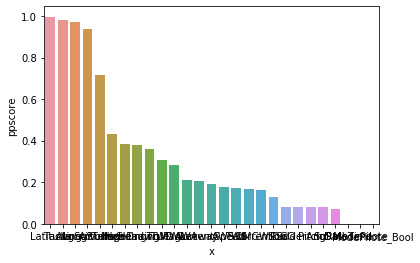

In [52]:
import seaborn as sns
sns.barplot(data=ppscore, x="x", y="ppscore")

Select features with more than 10% ppscore to use as features for the model

In [57]:
features_pps = ppscore[ppscore["ppscore"]>0.1]["x"].values
features_pps

array(['Latitude', 'Tacking', 'AvgSoS', 'Longitude', 'AirTemp', 'HoG',
       'VoltageDrawn', 'HeadingTrue', 'HeadingMag', 'TWD', 'TWA', 'AWA',
       'Leeway', 'CurrentSpeed', 'AWS', 'TWS', 'VMG', 'CurrentDir',
       'WSoG'], dtype=object)

In [58]:
features_pps = features_pps.tolist()
features_pps

['Latitude',
 'Tacking',
 'AvgSoS',
 'Longitude',
 'AirTemp',
 'HoG',
 'VoltageDrawn',
 'HeadingTrue',
 'HeadingMag',
 'TWD',
 'TWA',
 'AWA',
 'Leeway',
 'CurrentSpeed',
 'AWS',
 'TWS',
 'VMG',
 'CurrentDir',
 'WSoG']

Before using these features, we need to check if any of these features are highly correlated (large Pearson correlation). If so, we have to remove one of these features as it is not adding more extra information into the model

# Pearson Correlation

In [59]:
corrs = data_df.corr()
corrs["Tacking"].sort_values(ascending=False)

Tacking_Bool       1.000000
Tacking            1.000000
HoG                0.383559
HeadingTrue        0.331251
TWA                0.095994
AWA                0.059838
ModePilote_Bool    0.048399
ModePilote         0.048399
Yaw                0.045666
Leeway             0.034302
Latitude           0.031741
Longitude          0.028396
AvgSoS             0.025685
Roll               0.015235
Pitch              0.009247
SoG               -0.002544
SoS               -0.002634
CurrentDir        -0.002761
RudderAng         -0.004717
HeadingMag        -0.067484
TWS               -0.068948
WSoG              -0.072504
AWS               -0.073129
VoltageDrawn      -0.123102
VMG               -0.125816
TWD               -0.127346
CurrentSpeed      -0.156772
AirTemp           -0.197594
Name: Tacking, dtype: float64

No feature is too highly correlated with tacking

In [62]:
# Find abs correlation between all features and select features with >95% correlation
abs_corrs = abs(corrs)
corrs_table = abs_corrs[(abs_corrs>0.95)&(abs_corrs<1)]
cols = corrs_table.columns
corrs_table

,CurrentSpeed,CurrentDir,TWS,TWA,AWS,AWA,Roll,Pitch,HeadingMag,HoG,...,RudderAng,Leeway,TWD,WSoG,VoltageDrawn,Yaw,ModePilote,Tacking,Tacking_Bool,ModePilote_Bool
CurrentSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentDir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TWS,NaN,NaN,NaN,NaN,0.982228,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.998336,NaN,NaN,NaN,NaN,NaN,NaN
TWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWS,NaN,NaN,0.982228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.980632,NaN,NaN,NaN,NaN,NaN,NaN
AWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958541,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pitch,NaN,NaN,NaN,NaN,NaN,NaN,0.958541,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeadingMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HoG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
corrs_table = corrs_table.dropna(how="all",axis=0)
corrs_table = corrs_table.dropna(how="all",axis=1)
corrs_table

,TWS,AWS,Roll,Pitch,Longitude,Latitude,SoG,SoS,WSoG
TWS,NaN,0.982228,NaN,NaN,NaN,NaN,NaN,NaN,0.998336
AWS,0.982228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980632
Roll,NaN,NaN,NaN,0.958541,NaN,NaN,NaN,NaN,NaN
Pitch,NaN,NaN,0.958541,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,NaN,NaN,NaN,NaN,NaN,0.998001,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,0.998001,NaN,NaN,NaN,NaN
SoG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999889,NaN
SoS,NaN,NaN,NaN,NaN,NaN,NaN,0.999889,NaN,NaN
WSoG,0.998336,0.980632,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Large correlations between TWS ans AWS, TWS ans WSoG, AWS ans WSoG, Roll and Pitch, Longitude and Latitude, SoG and SoS 

In [56]:
# Remove features that are largely correlated with one another.
features_pps.remove("WSoG")
features_pps.remove("AWS")

# Remove both latitude and longitude as the data only includes one boat at one point in the world, but the model should 
# be generalised for any geographical location
features_pps.remove("Latitude")
features_pps.remove("Longitude")

# Remove Yaw as it is the sum of two features
features_pps.remove("Yaw")

features_pps

ValueError: list.remove(x): x not in list

In [ ]:
# Save features as json

import json
with open("../features_pps.json", "w") as write_file:
    json.dump(features_pps, write_file)